# Nesse notebook iremos realizar a análise os dados de música do Spotify
## Os dados foram baixados do Kaggle
Inicialmente faremos uma análise exploratória dos dados para tentar identificar padrões e/ou alguma hipótese interessante

In [1]:
#importar as bibliotecas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#O arquivo .csv foi hosperado no GitHub
fonte = ('https://raw.githubusercontent.com/brenocolaco/Analise-do-Spotify/main/dataset.csv')
dados = pd.read_csv(fonte)

In [3]:
#para ver todas as colunas
pd.set_option('display.max_columns', None)
#Observar as primeiras 10 linhas para ter uma ideia dos dados
dados.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


__Vemos que temos uma coluna unnamed que deve-se ao arquivo ter sido salvo com a coluna de indice. Então:__ 

In [4]:
#passamos o parametros index_col para que ela não apareça no dataframe
fonte = ('https://raw.githubusercontent.com/brenocolaco/Analise-do-Spotify/main/dataset.csv')
dados = pd.read_csv(fonte, index_col=0)
dados.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
#ver o tamanho do dataset
dados.shape

(114000, 20)

In [6]:
#ver o nome das colunas
dados.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

### Num primeiro momento vemos que temos uma boa quantidade dados (11400 ocorrências). Porém ao análisar as colunas, algumas delas nos não temos ideia de qual o seu significado (ex: 'explicit', 'danceability', 'energy', 'key')

Com isso, vamos no kaggle onde baixamos o csv e vamos pegar a descrição das colunas (o nosso dificionário)

### Column Description
* **track_id**: The Spotify ID for the track;

* **artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a (;);

* **album_name**: The album name in which the track appears;

* **track_name**: Name of the track;

* **popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity;

* **duration_ms**: The track length in milliseconds;

* **explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown);

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable;

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale;

* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1;

* **loudness**: The overall loudness of a track in decibels (dB);

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0;

* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks;

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic;

* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content;

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live;

* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry);

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration;

* **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.;

* **track_genre**: The genre in which the track belongs.

In [7]:
#para obter um resumo e ver a ocorrência de dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

**Pelo .info observamos que temos um unico elemento com dados nulos. É uma música que não apresenta nome da música, do artista e do album**

In [8]:
#criando a selecao pela coluna artists
selecao = dados['artists'].isnull()
dados[selecao]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


__Uma coisa que chama a atenção é que a duração dessa faixa é 0. Consideramos que não pode haver uma música com duração de 0 segundos.__

In [9]:
#verificar se há alguma outra musica com duração de 0 ms
dados.query('duration_ms == 0')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


__O interessante é que existe valores nos outros parâmetros, mas somente ela apresenta duração de 0 ms em todo o dataframe. Embora os outros parâmetros apresentem valores o que causa certa curiosidade, iremos retirar essa linha do nosso dataframe.__

In [10]:
#o parametro inplace True é passado para modificar o dataframe na origem
dados.dropna(inplace=True)
dados.shape

(113999, 20)

__Agora que tratamos dos dados nulos, vamos fazer uma análise dos generos de musicas q temos no nosso dataframe__

In [11]:
#Observar quais são os estilos de musica que temos no nosso dataset
dados['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [12]:
#Ver quantos generos musicais temos... 
len(dados['track_genre'].unique())

114

__(Não imaginava que existia tantos gêneros musicais)__

In [13]:
#Ver a ocorrência de cada gênero no dataframe
dados['track_genre'].value_counts()

acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: track_genre, Length: 114, dtype: int64

#### Foi feita uma amostra de 1000 músicas para cada estilo. Como retiramos uma que era relacionada ao k-pop temos 999 nesse estilo

In [14]:
#fazendo algumas seleções no dataframe
genero_duracao = dados[['track_genre', 'duration_ms']]
genero_popularidade = dados[['track_genre', 'popularity']]

In [15]:
media_duracao_por_genero = genero_duracao.groupby('track_genre').mean().sort_values(by=['duration_ms'], ascending = False)

In [16]:
media_popularidade_por_genero = genero_popularidade.groupby('track_genre').mean().sort_values(by=['popularity'], ascending = False)

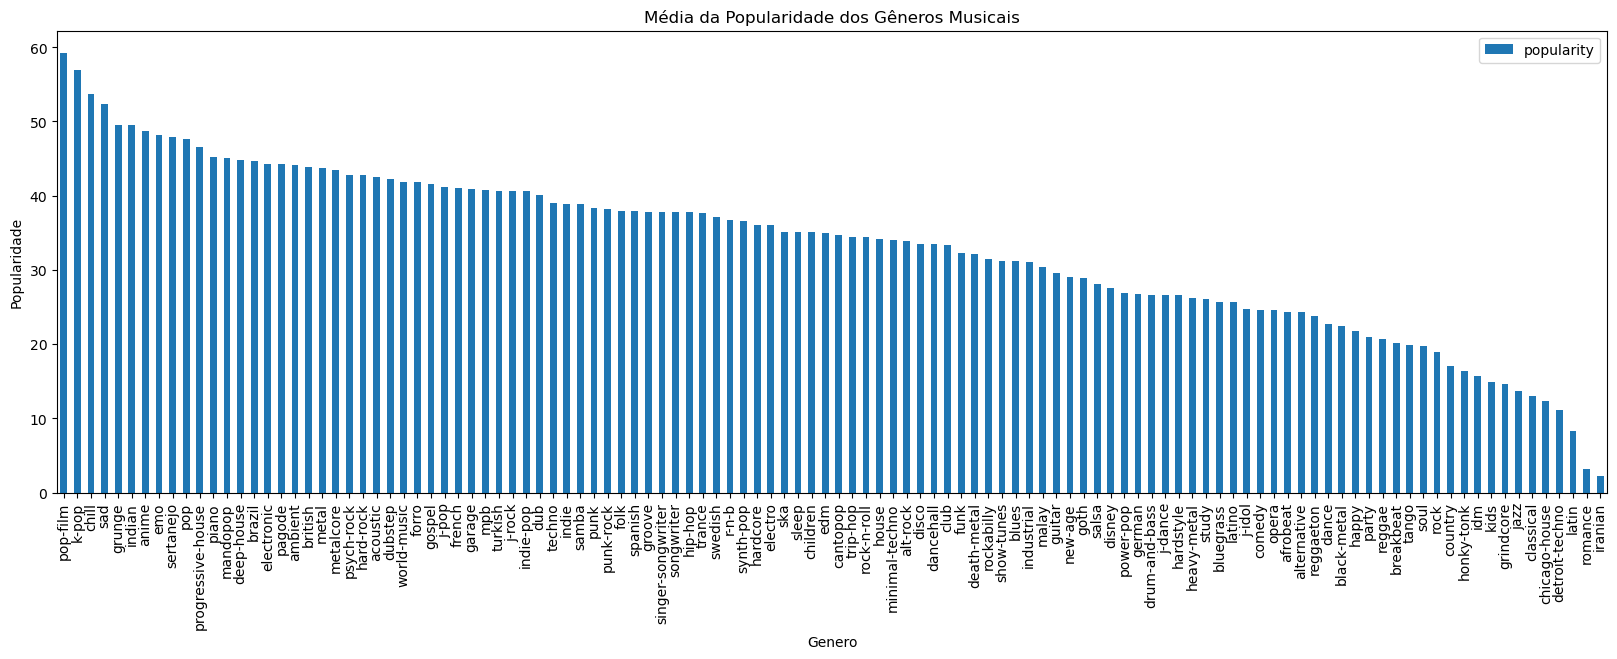

In [17]:
media_popularidade_por_genero.plot.bar(figsize=(20,6))
plt.xlabel("Genero")
plt.ylabel("Popularidade")
plt.title("Média da Popularidade dos Gêneros Musicais")
plt.show()

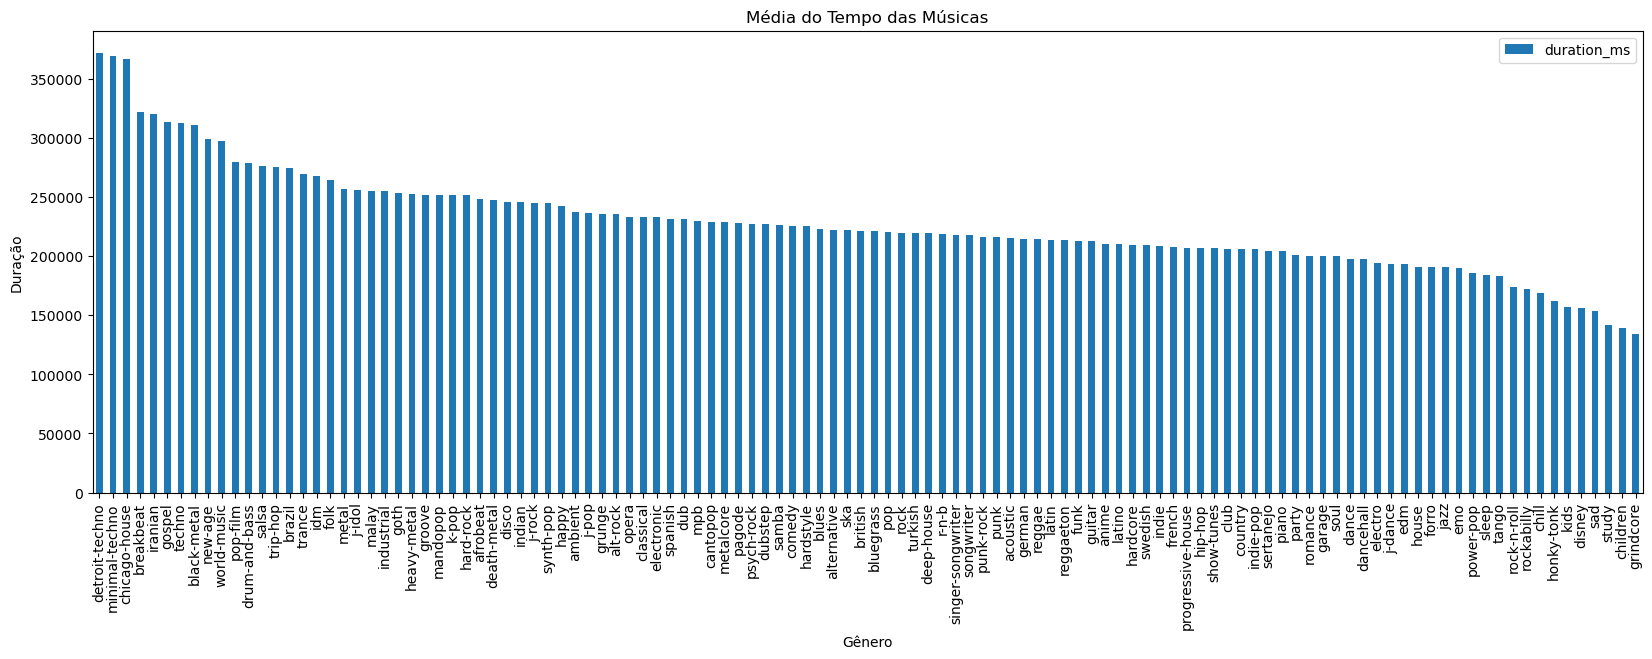

In [18]:
media_duracao_por_genero.plot.bar(figsize=(20,6))
plt.xlabel("Gênero")
plt.ylabel("Duração")
plt.title("Média do Tempo das Músicas")
plt.show()

#### Embora os gráficos apresentem muitas informações valiosas existe uma grande quantidade de estilos para ser analisados individualmente. Com isso, podemos, então, fazer algumas análises pelos extremos dos gráficos inicialmente

In [19]:
#obtendo os generos musicais para uma popularidade maior que 95
dados.query('popularity > 95')['track_genre'].unique()

array(['dance', 'edm', 'hip-hop', 'latin', 'latino', 'piano', 'pop',
       'reggae', 'reggaeton', 'rock'], dtype=object)

In [20]:
#outra forma de obter os valores para uma popularidade maior que 95
dados.query('popularity > 95')['track_genre'].drop_duplicates().reset_index(drop = True)

0        dance
1          edm
2      hip-hop
3        latin
4       latino
5        piano
6          pop
7       reggae
8    reggaeton
9         rock
Name: track_genre, dtype: object

##### Vemos assim que os generos mais populares são dance, edm, hip-hop, latino, piano, pop, reggae, reggaeton, rock

In [21]:
#pegar os 100 maiores valores pela popularidade
dados.nlargest(100, ['popularity'])

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91009,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,rock
99013,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,singer-songwriter
102018,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,songwriter
19350,3WMj8moIAXJhHsyLaqIIHI,Zach Bryan,Something in the Orange,Something in the Orange,89,228013,False,0.369,0.192,4,-12.151,0,0.0400,0.55500,0.000008,0.0954,0.148,175.212,3,country


In [22]:
#criar uma variavel para esses 100 maiores valores
cem_mais_populares = dados.nlargest(100, ['popularity'])

In [23]:
#verificar quais são os artistas e o nome dos albuns e usar o drop_duplicate para tirar valores duplicados
#que neste caso seriam de faixas contidas no próprio album
cem_mais_populares[['artists', 'album_name']].drop_duplicates()

,artists,album_name
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras)
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52"
20008,David Guetta;Bebe Rexha,I'm Good (Blue)
67356,Manuel Turizo,La Bachata
67358,Bad Bunny;Chencho Corleone,Un Verano Sin Ti
67359,Bad Bunny,Un Verano Sin Ti
20000,Chris Brown,Indigo (Extended)
79000,OneRepublic,I Ain’t Worried (Music From The Motion Picture...
67500,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti
81052,Harry Styles,As It Was


In [24]:
cem_mais_populares['artists'].unique()
cem_artistas_mais_populares = cem_mais_populares['artists'].unique().tolist()

In [25]:
top_dez_artistas_com_mais_musicas = dados['artists'].value_counts().head(10).index.tolist()

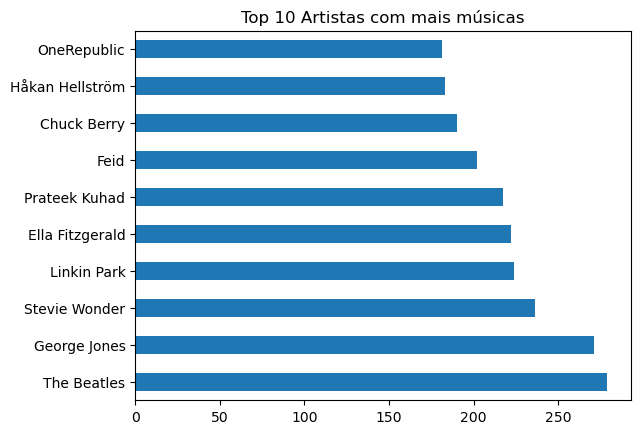

In [26]:
dados['artists'].value_counts().head(10).plot.barh()
plt.title('Top 10 Artistas com mais músicas')
plt.show()

In [27]:
print(set(cem_artistas_mais_populares) & set(top_dez_artistas_com_mais_musicas))

{'OneRepublic'}


__Entre os 10 artistas com mais musicas apenas 1, o One Republic, esta entre as 100 músicas mais populares.__

In [28]:
#outra forma de pegar os valores. Neste caso as 5 musicas com maior duração
long_songs = dados[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
long_songs

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10984,Crossing Wires 002 - Continuous DJ Mix,4789026
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897


__Realizar a correlação das variáveis para tentar criar algumas hipóteses__

In [29]:
correlacao = dados.corr(method='pearson', numeric_only=True)
correlacao

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011
acousticness,-0.025458,-0.103770,-0.094400,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142


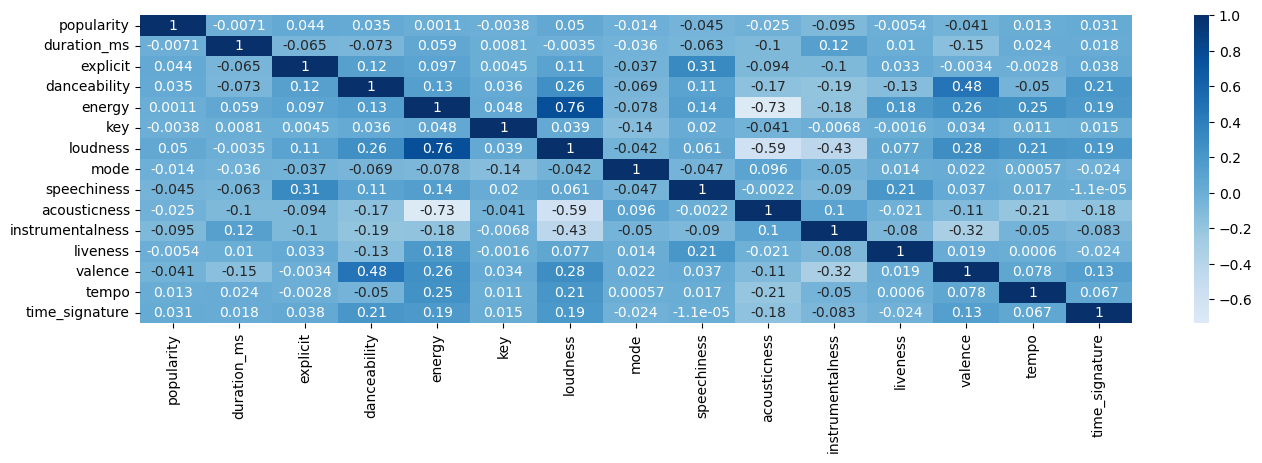

In [30]:
# Plotar o gráfico da correlação anterior mediante um mapa de calor (heatmap)
# NOTA: annot = True mostra os valores dentro de cada caixinha
plt.figure(figsize=(16,4))
sns.heatmap(correlacao, cmap = "Blues", center = 0, annot = True)
plt.show()

## Pré-Processamento dos Dados


In [31]:
#Removendo itens duplicados

dados = dados.drop_duplicates()
dados.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [32]:
dados.shape

(113549, 20)

__Removendo os dados duplicados passamos há ter 113549 entradas, uma vez que, ja haviamos tirados os dados nulos anteriormente__

### Criar classes para as poularidades
**DICA-1**: para prosseguir com o modelo de classificação, você precisa converter a coluna de popularidade em
uma classe binária (1 para popular, 0 para não popular). </br>
**DICA-2**: Para realizar o processo de corte de popularidade, você pode criar uma nova coluna de classe utilizando o método select() da bibllioteca Numpy.



A **Series.select()** função Pandas retorna dados correspondentes aos critérios de correspondência dos rótulos dos eixos. Passamos o nome da função como um argumento para esta função que é aplicada em todos os rótulos de índice. Os rótulos de índice que atendem aos critérios são selecionados.

In [33]:
#numpy.select(condlist, choicelist, default=0)

#criando classes de popularidade

#primeiro condlist(condições)
condlist = [
    (dados['popularity'] >= 70),
    (dados['popularity'] < 70)    
]
#segundo choicelist(pela dica 1 temos 1,0)
choicelist = [1,0]

#criar coluna popularity_class
#uma vez que usamos o zero na choicelist, mudaos o valor do default
dados['popularity_class'] = np.select(condlist, choicelist, default = 'Não informado')

### Uma vez que os modelos do scikit learn exigem que os atributos sejam numeros. Precisamos tratar disso

In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

__Podemos ver que a coluna de classe da popularidade que criamos ela é definida como object. Primeiramente, temos que transforma-la em um tipo numérico. Como são apenas uns e zeros transformar para inteiro.__

In [35]:
#Invocando a função astype() e atribuindo o resultado de volta à coluna
dados['popularity_class'] = dados['popularity_class'].astype(int)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

In [36]:
#Ficando so com os dados numéricos
#fazer uma copia dos dados
dados_numericos = dados

#varrer o dataframe para obter as colunas que tem dados não numericos
lista = []
for columns in dados:
    if dados[columns].dtype == 'object' or dados[columns].dtype == 'bool':
        lista.append(columns)
        
print(lista)

['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']


In [37]:
dados_numericos = dados.drop(columns=lista)
dados_numericos

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_class
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,1
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,1
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,0
113996,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,0
113997,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0
113998,41,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


__Como ja convertemos a coluna de popularidade vamos retira-la dos dados_numericos__

In [38]:
dados_numericos = dados_numericos.drop(columns=['popularity'])
dados_numericos.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_class
0,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,1
1,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,1
4,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


**Uma vez que ja organizamos os dados:**

__Se a distribuição não é normal (Gaussiana) ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.__ 

"Cuidado com os outliers, alguns artigos irão dizer que normalizar é o melhor método e também encontrará artigos dizendo que padronizar os dados é a opção a ser feita. Como já diz o teorema No Free Lunch, a melhor saída é testar e avaliar o resultado. Isso vale tanto para algoritmos de detecção de outliers, quanto para não suavizar efeitos de outliers em seu dataset." (Arthur Lamblet Vaz, 2019)



## Usando o escalonamento de recurso min-max

A abordagem mín-máx (frequentemente chamada de normalização) redimensiona o recurso para um intervalo fixo e rápido de [0,1] subtraindo o valor mínimo do recurso e dividindo pelo intervalo. Podemos aplicar a escala min-max no Pandas usando os métodos .min() e .max().


In [39]:
dados_numericos_norm = (dados_numericos - dados_numericos.min()) / (dados_numericos.max()-dados_numericos.min())

In [40]:
dados_numericos_norm.head()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_class
0,0.042473,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,1.0
1,0.026971,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.038679,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.036978,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,1.0
4,0.036389,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


In [41]:
dados_numericos_norm['popularity_class'].value_counts()

0.0    108081
1.0      5468
Name: popularity_class, dtype: int64

__Uma vez que o objetivo é a partir de um X (parametros) obtermos um Y (saída).__ 
Vamos definir nosso Y como a popularidade e o nosso X como as demais colunas

In [42]:
X = dados_numericos_norm.drop('popularity_class', axis=1)
Y = dados_numericos['popularity_class']

## Preparando o dataset

__Dividindo para treino, validação e testes__

Para realizar a divisão dos dados para treino e teste vamos usar a biblioteca do scikit-learn

In [43]:
#importando a biblioteca
from sklearn.model_selection import train_test_split

In [44]:
#para obter o mesmo resultado aplicamos um valor ao random_state
SEED = 101
#Separando os dados em treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y, test_size = 0.25, random_state = SEED)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 85161 elementos e testaremos com 28388 elementos


In [45]:
#instanciar o modelo
from sklearn import linear_model
reg = linear_model.LogisticRegression()

In [46]:
#introduzir informações ao modelo
reg.fit(treino_x, treino_y)

LogisticRegression()

In [47]:
#testar o modelo
previsoes = reg.predict(teste_x)


In [48]:
#importar o accuracy_score
from sklearn.metrics import accuracy_score
#comparar os y de treino com as previsoes para obter a acurácia
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.04%


In [49]:
teste_y.value_counts(normalize=True)

0    0.950366
1    0.049634
Name: popularity_class, dtype: float64

In [50]:
treino_y.value_counts(normalize=True)

0    0.952337
1    0.047663
Name: popularity_class, dtype: float64

Ao analisar pelo value_counts as variáveis de saída pode-se observar que há a mesma proporção entre os dados de treino e teste. NO caso de não haver essa proporção isso pode gerar problemas no modelo. Então devemos passar o parametro stratify = y para que a separação seja feita mantendo uma proporção das variaveís.

Baseline para o modelo:

A linha de base, como o nome ja diz, é uma base para análise do modelo se o nosso modelo apresentou uma pontuação melhor que a linha de base, então isso nos diz que nosso modelo é 'bom'.

In [51]:
#para a nossa baseline vamos importar o Dummy Classifier
import numpy as np
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 95.04%


**Podemos notar que pela divisão aleatoria dos dados a nossa baseline apresentou, exatamente, o mesmo valor de acurácia que o modelo. Então, nessa situação, o nosso modelo se mostrou ineficiente.**





Uma vez que o nosso primeiro modelo, pela divisão aleatoria, não nos apresentou um resultado, embora alto, satisfatório. Vamos optar por fazer a validação cruzada dos dados. 

"...a validação cruzada, que é usada para avaliar a capacidade de generalização do modelo em diferentes conjuntos de dados. Ela ajuda muito a evitar o overfitting, que é quando um modelo se ajusta demais aos dados de treinamento, mas não generaliza bem para novos dados." (Letícia Pires, 2023)

**Dica:** a partir do dataframe de treino (df_train), utilize a validação cruzada para separação dos dados em treino e teste. Tente utilizar a classe StratifiedKFold e aplicar um looping para separar os dados.

In [52]:
#Importando os modulos
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

In [53]:
type(X)


pandas.core.frame.DataFrame

In [54]:
type(Y)

pandas.core.series.Series

In [55]:
X_array = X.to_numpy()
type(X_array)

numpy.ndarray

In [56]:
Y_array = Y.to_numpy()
type(Y_array)

numpy.ndarray

In [57]:
#instanciar o modelo
from sklearn import linear_model
reg = linear_model.LogisticRegression(max_iter=120)

Segundo a documentação, temos: </br>
Esse objeto de validação cruzada é uma variação do KFold que retorna dobras estratificadas. As dobras são feitas preservando a porcentagem de amostras para cada classe

In [58]:
# Criando um objeto StratifiedKFold.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
lst_accu_stratified = []



In [59]:
#Looping para separar os dados de treino e teste
for train_index, test_index in skf.split(X, Y):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    #treinando o modelo
    reg.fit(x_train, y_train)
    #Avalia uma pontuação para a validação cruzada
    lst_accu_stratified.append(reg.score(x_test, y_test))

Os X e Y foram transformados em um array do numpy pois se passarmos uma series ou dataframe ao objeto StratifiedKFold ele nos retorna um erro. Uma outra opção, seria passar o metodo i.loc, uma vez que, ele recebe como parametro o valor do index. <br>

O parametro max_iter do modelo de regressão foi aumentado para 120 pois o default 100 apresentava um erro (STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.)

In [60]:
# Printando as pontuações colocadas na lista.
print('Lista de acurrácia possível:', lst_accu_stratified)
print('\nAcurácia máxima que pode ser obtida neste modelo é:',
      max(lst_accu_stratified)*100, '%')
print('\nAcurácia Mínima:',
      min(lst_accu_stratified)*100, '%')
print('\nAcurácia Geral:',
      mean(lst_accu_stratified)*100, '%')
print('\nO desvio padrão é:', stdev(lst_accu_stratified))

Lista de acurrácia possível: [0.9518273888154998, 0.9518273888154998, 0.9518273888154998, 0.9518714222809335, 0.9518693029195473]

Acurácia máxima que pode ser obtida neste modelo é: 95.18714222809335 %

Acurácia Mínima: 95.18273888154998 %

Acurácia Geral: 95.1844578329396 %

O desvio padrão é: 2.3549635115331794e-05


"A Regressão Logística é frequentemente usada como um modelo de baseline em problemas de classificação, por ser um modelo simples e fácil de interpretar. Ela estima probabilidades usando uma função logística (tome cuidado: apesar de ter regressão no nome, ela é usada para classificação).
<br>
**DICA**: Mas modelos de classificação não se restringem somente à Regressão Logística. Você pode explorar outros modelos de classificação como: Naive Bayes, Floresta Aleatória, Árvore de Decisão, XGBoost, e outros." (Letícia Pires, 2023)

In [61]:
reg.coef_.tolist()[0]

[-1.6121857592570399,
 1.2738810989489264,
 -1.488528098827716,
 -0.008666376868553075,
 4.624481980615123,
 -0.08816634868423548,
 -1.3078564819465908,
 -1.2648205975106286,
 -2.1738534071250477,
 -1.383973898444752,
 -0.3164350408829922,
 -0.7547573185700045,
 0.3954446868710784]

In [62]:
lista_de_coeficientes = {
    'Features' : X.columns,
    'Coef' : reg.coef_.tolist()[0]
}
dados_dos_coeficientes = pd.DataFrame(lista_de_coeficientes)
dados_dos_coeficientes

,Features,Coef
0,duration_ms,-1.612186
1,danceability,1.273881
2,energy,-1.488528
3,key,-0.008666
4,loudness,4.624482
5,mode,-0.088166
6,speechiness,-1.307856
7,acousticness,-1.264821
8,instrumentalness,-2.173853
9,liveness,-1.383974


"Utilizar métricas adequadas de validação de modelos de Machine Learning é crucial em um projeto. O valor delas reflete a qualidade de um modelo, portanto, se forem mal escolhidas, pode ser impossível avaliar se o modelo atende aos requisitos necessários." (Letícia Pires, 2023)

# Relatório do Modelo de Classificação com a biblioteca yellowbrick

In [63]:
from yellowbrick.classifier import ClassificationReport

Precision: capacidade um classificador de não rotular uma instancia como positiva como realmente negativa. De todas as instancias clasifficadas como positivas, qual percentual está realmente correto?

Recall: Capacidade de um classificador encontrar todas as instancias positivas. Para todos os casos que realmente são positivos, qual porcentagem foi classificada corretamente?

F1-score: Média harmonica ponderada de precisão e recall, de modo que a melhor porntuação seja 1 e a pior seja 0

Support: Número de ocorrencias reais da classe no conjunto de dados


C:\Users\breno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


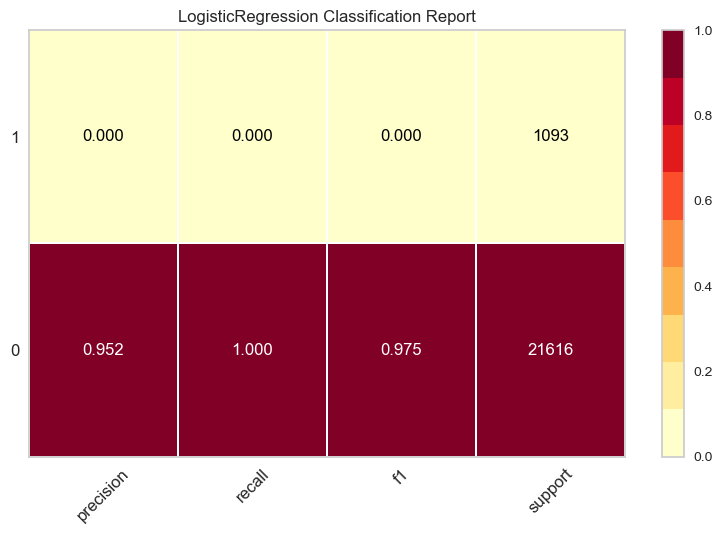

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [64]:
visualizer = ClassificationReport(reg, support = True)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

C:\Users\breno\anaconda3\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


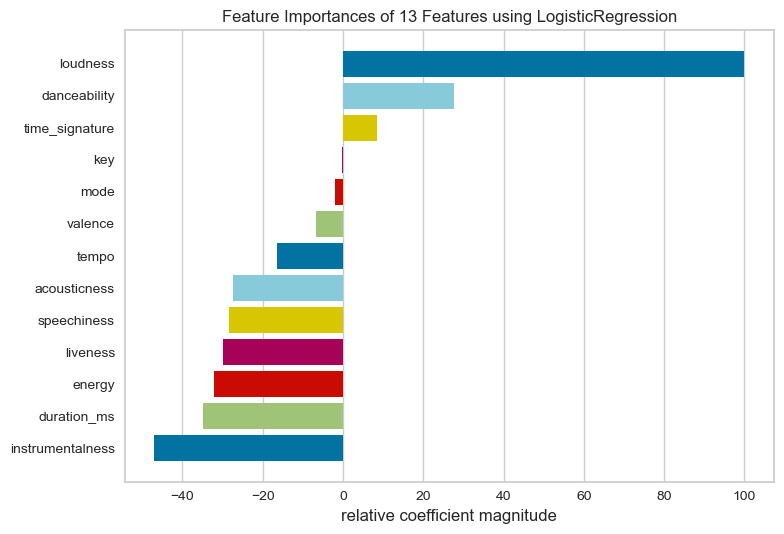

<Axes: title={'center': 'Feature Importances of 13 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [65]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(reg)
viz.fit(X, Y)
viz.show()

In [66]:
from yellowbrick.classifier import ConfusionMatrix

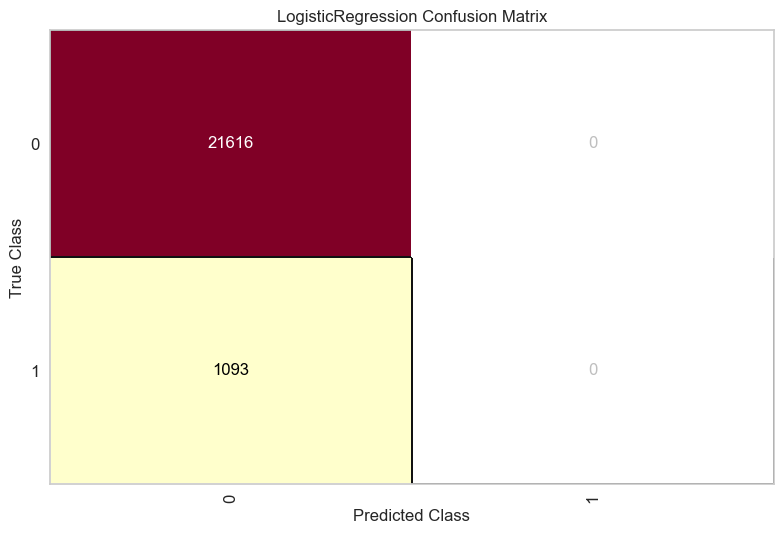

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [67]:
confusion_matrix = ConfusionMatrix(reg)
confusion_matrix.fit(x_train, y_train)
confusion_matrix.score(x_test, y_test)
confusion_matrix.show()

## Tentando o modelo de Árvore de Classificação para verificar a classe 1 

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
clfAD = DecisionTreeClassifier(random_state=0)
clfAD = clfAD.fit(x_train,y_train)

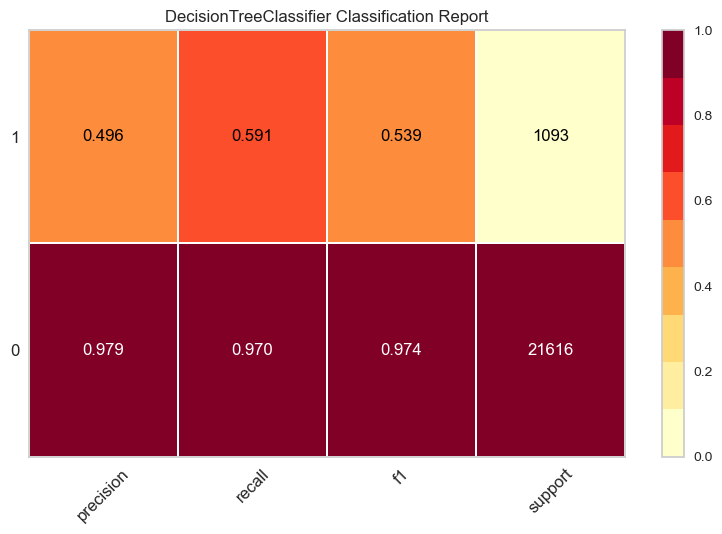

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [69]:
visualizer = ClassificationReport(clfAD, support = True)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

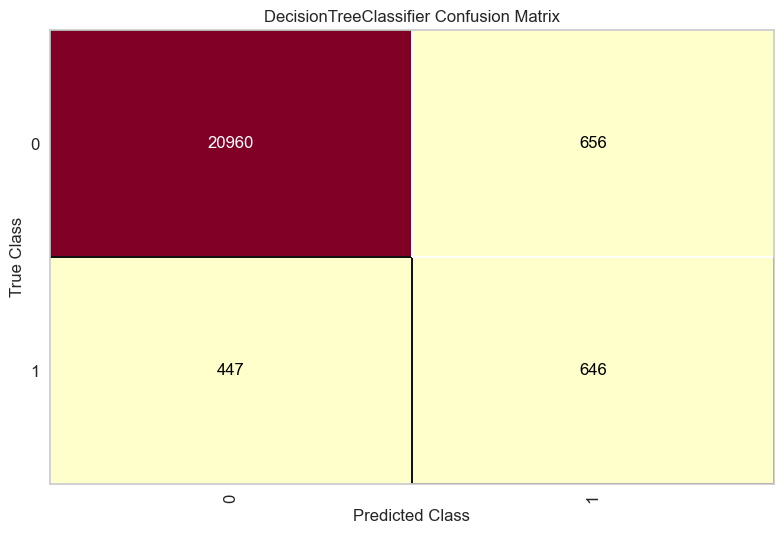

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
confusion_matrix = ConfusionMatrix(clfAD)
confusion_matrix.fit(x_train, y_train)
confusion_matrix.score(x_test, y_test)
confusion_matrix.show()

# Realizando um balanceamento de dados usando oversampling ou undersampling

### Desse modo temos que tentar ajustar a classe do modelo ou, tentar prosseguir com outro modelo que consiga lidar melhor com dados desbalanceados.

In [71]:
from imblearn.under_sampling import RandomUnderSampler

# X são as features e y é o vetor de classes
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, Y)

In [72]:
#verificando os valores para ver se estão no mesmo valor
y_resampled.value_counts()

0    5468
1    5468
Name: popularity_class, dtype: int64

In [73]:
#Looping para separar os dados de treino e teste
for train_index, test_index in skf.split(X_resampled, y_resampled):
    x_train, x_test = X_array[train_index], X_array[test_index]
    y_train, y_test = Y_array[train_index], Y_array[test_index]
    
    #treinando o modelo
    reg.fit(x_train, y_train)
    
    #Avalia uma pontuação para a validação cruzada
    lst_accu_stratified.append(reg.score(x_test, y_test))

In [74]:
# Printando as pontuações colocadas na lista.
print('Lista de acurrácia possível:', lst_accu_stratified)
print('\nAcurácia máxima que pode ser obtida neste modelo é:',
      max(lst_accu_stratified)*100, '%')
print('\nAcurácia Mínima:',
      min(lst_accu_stratified)*100, '%')
print('\nAcurácia Geral:',
      mean(lst_accu_stratified)*100, '%')
print('\nO desvio padrão é:', stdev(lst_accu_stratified))

Lista de acurrácia possível: [0.9518273888154998, 0.9518273888154998, 0.9518273888154998, 0.9518714222809335, 0.9518693029195473, 0.9620658135283364, 0.9570187471422039, 0.9597622313671696, 0.9561042524005487, 0.9515317786922726]

Acurácia máxima que pode ser obtida neste modelo é: 96.20658135283364 %

Acurácia Mínima: 95.15317786922725 %

Acurácia Geral: 95.45705714777512 %

O desvio padrão é: 0.003913926704303765


C:\Users\breno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


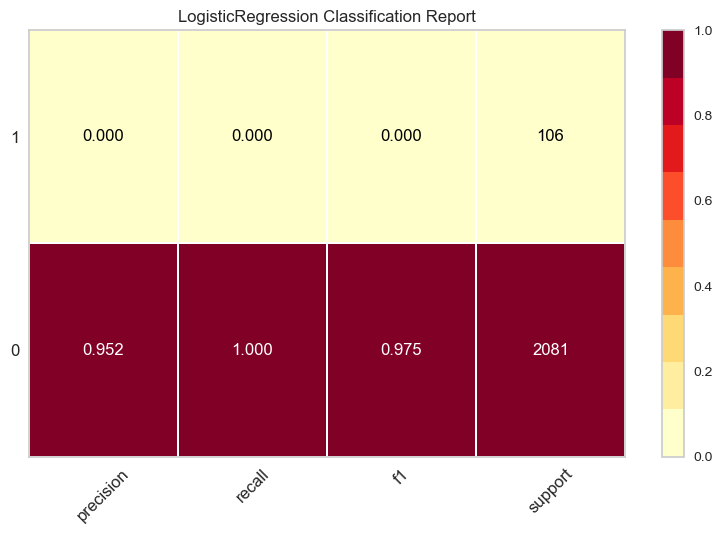

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [75]:
visualizer = ClassificationReport(reg, support = True)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

### Embora a acurácia do modelo nos mostre uma acurácia até maior do que quando os dados não tinham passado pelo processo de undersample. Podemos, verificar que a classe 1 não apresenta dados para um modelo de regressão logistica

## Aplicando o modelo de Árvore de classificação para os dados já balanceados

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
clfAD = DecisionTreeClassifier(random_state=0)
clfAD = clfAD.fit(x_train,y_train)

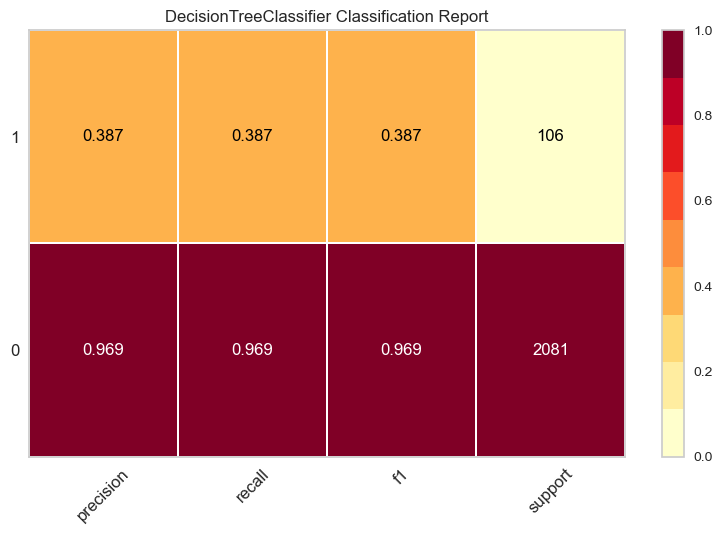

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [77]:
visualizer = ClassificationReport(clfAD, support = True)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

#### Uma vez que, temos uma previsão para os dados da classe 1. Verificar, também, atraves de uma matriz de confusão.

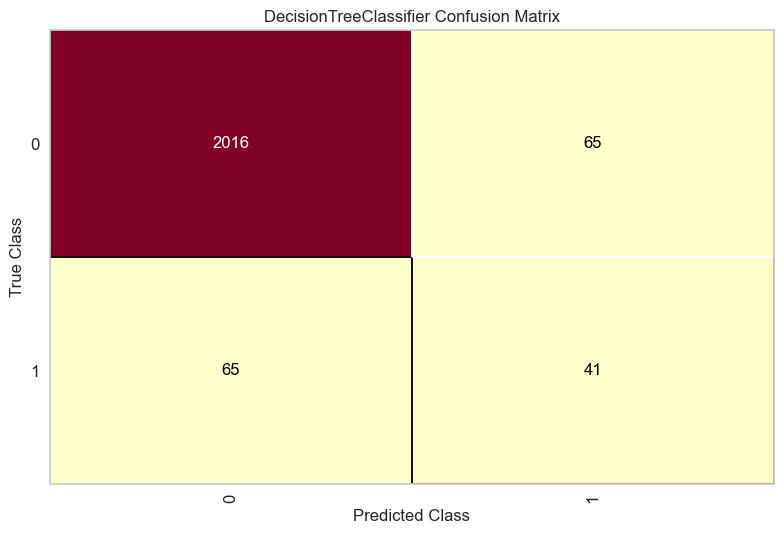

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [78]:
confusion_matrix = ConfusionMatrix(clfAD)
confusion_matrix.fit(x_train, y_train)
confusion_matrix.score(x_test, y_test)
confusion_matrix.show()